<h1 style="color:blue;text-align:center">Descriptive Statistics</h1>

+ 1. The two files stud-data.csv and exam-data.csv contain the data of students of two study programs as well as the   results of the exams from the 3rd semester of the winter semester 21/22.
    + mat.nr matriculation number
    + gender sex
    + semester current semester
    + course course of study
    + exam matriculation number/exams
    + attempt number of attempt
    + score achieved score

+ (a) Import the files stud.data, exam.data as tibbles.

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
df <- read.csv('exam_data.csv') %>% as_tibble()
df %>% head()

X,exam,attempt,score
<int>,<chr>,<int>,<int>
1,516647/Mathematics,1,75
2,193841/Data Bases,2,49
3,326761/Computer Networks,2,75
4,230275/Data Bases,1,73
5,911920/OOP,1,55
6,840873/Formal Languages,1,33


+ (b) Determine the scale and type of all variables.

In [86]:
#-----------------------------------------------
# | variable      |   type       |     scale   |
#-----------------------------------------------
# |  exam          |  qualitative |    nominal |
# |  attempt       |  quantitative|    ratio   | 
# |  score         | quantitative |    ordinal | 


+ (c) Add a variable grade that indicates the grade of the exam. The
   grade is derived from the score as follows:
    +  Grade 5 if score < 50
    +  Grade 4, if 50 ≤ score < 65
    + Grade 3, if 65 ≤ score < 80
    +  Grade 2, if 80 ≤ score < 90
    + Grade 1, if 90 ≤ score

In [14]:
df %>% mutate(
    grade=case_when(
        score<50~5,
        (score>=50 & score<65)~4,
        (score>=65 & score<80)~3,
        (score>=80 & score<90)~2,
        score>=90~1
    )
 )->df
head(df)

X,exam,attempt,score,grade
<int>,<chr>,<int>,<int>,<dbl>
1,516647/Mathematics,1,75,3
2,193841/Data Bases,2,49,5
3,326761/Computer Networks,2,75,3
4,230275/Data Bases,1,73,3
5,911920/OOP,1,55,4
6,840873/Formal Languages,1,33,5


+ (d) Split the variable exam into 2 columns containing the matriculation number and the exam subject

In [16]:
df %>% separate(col = exam,into = c('mat.nr','subject'),sep = '/')->df
head(df)

X,mat.nr,subject,attempt,score,grade
<int>,<chr>,<chr>,<int>,<int>,<dbl>
1,516647,Mathematics,1,75,3
2,193841,Data Bases,2,49,5
3,326761,Computer Networks,2,75,3
4,230275,Data Bases,1,73,3
5,911920,OOP,1,55,4
6,840873,Formal Languages,1,33,5


+ (e) Determine the total number of tests in each exam and the number
   of students participating

In [38]:
## total number of tests in each exam
df %>% group_by(subject) %>% summarise(num_of_exam=n()) 

subject,num_of_exam
<chr>,<int>
Computer Networks,186
Data Bases,190
Formal Languages,190
Mathematics,185
OOP,196
Software Engineering,190


In [55]:
## total number of students
df %>% select(mat.nr) %>% unique() %>% dim() ->dim
dim[1]

[1] 243

In [17]:
str(df)

tibble [1,137 × 6] (S3: tbl_df/tbl/data.frame)
 $ X      : int [1:1137] 1 2 3 4 5 6 7 8 9 10 ...
 $ mat.nr : chr [1:1137] "516647" "193841" "326761" "230275" ...
 $ subject: chr [1:1137] "Mathematics" "Data Bases" "Computer Networks" "Data Bases" ...
 $ attempt: int [1:1137] 1 2 2 1 1 1 2 2 2 1 ...
 $ score  : int [1:1137] 75 49 75 73 55 33 56 102 26 67 ...
 $ grade  : num [1:1137] 3 5 3 3 4 5 4 1 5 3 ...


In [18]:
df$subject %>% unique()

[1] "Mathematics"          "Data Bases"           "Computer Networks"   
[4] "OOP"                  "Formal Languages"     "Software Engineering"

In [19]:
df$attempt %>% unique()

[1] 1 2 3

In [26]:
df$mat.nr %>% unique() %>% length(); length(df$mat.nr)

[1] 243

[1] 1137

+ (f) For each subject, determine the absolute frequencies of the grades
and store the result in a tibble with the variables grade, Computer
Networks, Data Bases, Formal Languages, Mathematics, OOP and
Software Engineering.

In [60]:
df %>% group_by(grade,subject) %>% summarise(count=n()) %>% spread(key = subject,value = count)

`summarise()` has grouped output by 'grade'. You can override using the `.groups` argument.


grade,Computer Networks,Data Bases,Formal Languages,Mathematics,OOP,Software Engineering
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,6,10,4,4,4,1
2,8,12,6,16,15,19
3,58,46,57,43,62,57
4,53,69,75,72,69,76
5,61,53,48,50,46,37


+ (g) For each subject, determine the minimum, maximum, the three
  quartiles, the mean of the variable score, the number of participants and the dropout rates.

In [67]:
df %>% mutate(fail=if_else(grade<=4,1,0)) %>% group_by(subject) %>% summarise( 
      min=min(score),
      max=max(score),
      q1=quantile(score,0.25),
      q2=quantile(score,0.5),
      q3=quantile(score,0.75),
      mean=mean(score),
      n=n(),
      drop_out_rate=sum(fail)/n
      
)

subject,min,max,q1,q2,q3,mean,n,drop_out_rate
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Computer Networks,29,108,48.00,60.0,70.75,59.41398,186,0.6720430
Data Bases,9,95,49.00,59.5,71.00,60.31579,190,0.7210526
Formal Languages,18,97,49.25,59.0,68.00,58.90000,190,0.7473684
Mathematics,19,102,49.00,57.0,70.00,58.61622,185,0.7297297
OOP,22,102,50.00,61.0,69.00,60.34694,196,0.7653061
Software Engineering,24,94,52.00,60.0,71.75,61.15263,190,0.8052632


+ (h) Create side by side boxplots of the score for each subject and
   interpret the results

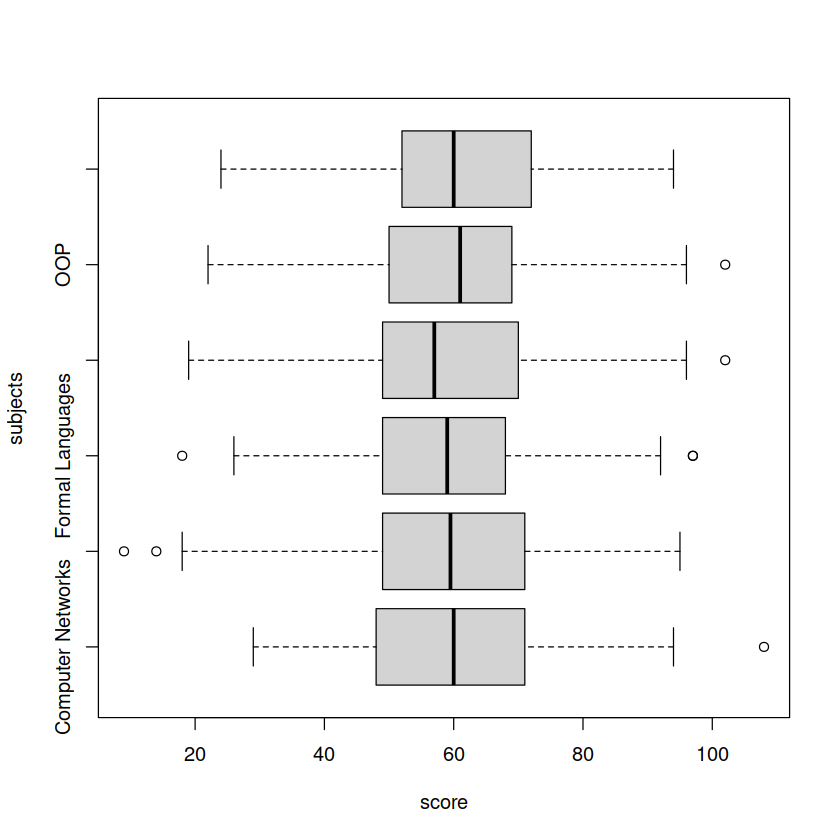

In [70]:
boxplot(df$score~df$subject,horizontal = T,xlab = 'score',ylab='subjects')

+ (i) Determine the contingency table of the variables attempt and grade and determine the indifference table and     chi-square value..

In [75]:
# con table
table(df$attempt,df$grade) %>% addmargins()

,1,2,3,4,5,Sum
1,14,49,206,226,184,679
2,14,21,84,142,84,345
3,1,6,33,46,27,113
Sum,29,76,323,414,295,1137


In [83]:
# chi.sq
test.result<-chisq.test(df$attempt,df$grade)
test.result$statistic

Warning message in chisq.test(df$attempt, df$grade):
“Chi-squared approximation may be incorrect”


X-squared 
 14.05124

In [85]:
test.result$expected %>% addmargins()

,1,2,3,4,5,Sum
1,17.318382,45.38610,192.89094,247.23483,176.16974,679
2,8.799472,23.06069,98.00792,125.62005,89.51187,345
3,2.882146,7.55321,32.10114,41.14512,29.31838,113
Sum,29.000000,76.00000,323.00000,414.00000,295.00000,1137



<h1 style="color:blue;text-align:center">Probability</h1>

+ 3. The weight of bags of grain can be assumed to be a random variable
    with expected value 50 kg and standard deviation 2 kg. The price for
    one kilogram grain, which a farmer achieves, is 0.53 Euro per kg. 300
    bags of grain fit into a truck. Let X be the price a farmer can obtain
    for a fully loaded truck.
    You can assume that the weights of bags are independent and identically distributed random variables.

+ (a) Determine an approximate distribution of the random variable X.

In [ ]:
# X ~ N(mu=50*0.53*300,sd=2*0.53*300) approximately normal distribution

+ (b) Find the probability that X is bigger than 8000 Euro.

In [93]:
mu<-50*0.53*300
sd<-2*(0.53**2)*300
1- pnorm(8000,mean=mu,sd=sd)

[1] 0.383361